In [1]:
import numpy as np
import pandas as pd
import math
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

### Readin Data

In [2]:
import os
data_folder = '/Users/yunya/1003/project/COVID-19/csse_covid_19_data/csse_covid_19_time_series'

file1= 'time_series_covid19_confirmed_US.csv'
file2= 'time_series_covid19_deaths_US.csv'

path_1 = os.path.join(data_folder,file1)
path_2 = os.path.join(data_folder,file2)

confirmed_df_raw = pd.read_csv(path_1)
deaths_df_raw = pd.read_csv(path_2)

In [3]:
print(*confirmed_df_raw.columns,sep='\n')

UID
iso2
iso3
code3
FIPS
Admin2
Province_State
Country_Region
Lat
Long_
Combined_Key
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3/20
3/4/20
3/5/20
3/6/20
3/7/20
3/8/20
3/9/20
3/10/20
3/11/20
3/12/20
3/13/20
3/14/20
3/15/20
3/16/20
3/17/20
3/18/20
3/19/20
3/20/20
3/21/20
3/22/20
3/23/20
3/24/20
3/25/20
3/26/20
3/27/20
3/28/20
3/29/20
3/30/20
3/31/20
4/1/20
4/2/20
4/3/20
4/4/20
4/5/20
4/6/20
4/7/20
4/8/20
4/9/20
4/10/20
4/11/20
4/12/20
4/13/20
4/14/20
4/15/20
4/16/20
4/17/20
4/18/20
4/19/20
4/20/20
4/21/20
4/22/20
4/23/20
4/24/20
4/25/20
4/26/20
4/27/20


In [4]:
print(*deaths_df_raw.columns,sep='\n')

UID
iso2
iso3
code3
FIPS
Admin2
Province_State
Country_Region
Lat
Long_
Combined_Key
Population
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3/20
3/4/20
3/5/20
3/6/20
3/7/20
3/8/20
3/9/20
3/10/20
3/11/20
3/12/20
3/13/20
3/14/20
3/15/20
3/16/20
3/17/20
3/18/20
3/19/20
3/20/20
3/21/20
3/22/20
3/23/20
3/24/20
3/25/20
3/26/20
3/27/20
3/28/20
3/29/20
3/30/20
3/31/20
4/1/20
4/2/20
4/3/20
4/4/20
4/5/20
4/6/20
4/7/20
4/8/20
4/9/20
4/10/20
4/11/20
4/12/20
4/13/20
4/14/20
4/15/20
4/16/20
4/17/20
4/18/20
4/19/20
4/20/20
4/21/20
4/22/20
4/23/20
4/24/20
4/25/20
4/26/20
4/27/20


In [5]:
confirmed_df_raw.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,136,136,136,136,136,139,141,141,141,141
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,53,53,53,53,54,54,54,55,57,57


### Get the province list and it's corresponding regions and Population

In [6]:
province_list = confirmed_df_raw['Province_State'].unique()
region_dic = {}
for province in province_list:
    region_dic[province]=confirmed_df_raw[confirmed_df_raw.Province_State==province]['Admin2'].unique()
region_dic

{'American Samoa': array([nan], dtype=object),
 'Guam': array([nan], dtype=object),
 'Northern Mariana Islands': array([nan], dtype=object),
 'Puerto Rico': array([nan], dtype=object),
 'Virgin Islands': array([nan], dtype=object),
 'Alabama': array(['Autauga', 'Baldwin', 'Barbour', 'Bibb', 'Blount', 'Bullock',
        'Butler', 'Calhoun', 'Chambers', 'Cherokee', 'Chilton', 'Choctaw',
        'Clarke', 'Clay', 'Cleburne', 'Coffee', 'Colbert', 'Conecuh',
        'Coosa', 'Covington', 'Crenshaw', 'Cullman', 'Dale', 'Dallas',
        'DeKalb', 'Elmore', 'Escambia', 'Etowah', 'Fayette', 'Franklin',
        'Geneva', 'Greene', 'Hale', 'Henry', 'Houston', 'Jackson',
        'Jefferson', 'Lamar', 'Lauderdale', 'Lawrence', 'Lee', 'Limestone',
        'Lowndes', 'Macon', 'Madison', 'Marengo', 'Marion', 'Marshall',
        'Mobile', 'Monroe', 'Montgomery', 'Morgan', 'Perry', 'Pickens',
        'Pike', 'Randolph', 'Russell', 'St. Clair', 'Shelby', 'Sumter',
        'Talladega', 'Tallapoosa', 'Tus

In [7]:
population=deaths_df_raw[['Province_State','Admin2','Population']]
population.head()

,Province_State,Admin2,Population
0,American Samoa,NaN,55641
1,Guam,NaN,164229
2,Northern Mariana Islands,NaN,55144
3,Puerto Rico,NaN,2933408
4,Virgin Islands,NaN,107268


In [8]:
deaths_df_raw = deaths_df_raw.drop(['Population'],axis=1)

### Transform Data Into Time Series Format

In [9]:
def time_series_df(df,province):
    col_drp = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Province_State',
                                'Country_Region','Lat', 'Long_','Combined_Key']
    df_ts = df[df['Province_State']=='New York'].drop(col_drp,axis=1).T
    df_ts.columns = df_ts.iloc[0]
    df_ts = df_ts[1:]
    df_ts['Total']=df_ts.sum(axis=1)
    df_ts = df_ts.reset_index().rename(columns={'index':'Date'})
    df_ts['cum_Total']=df_ts.Total.cumsum()
    return df_ts

In [10]:
death_ts = time_series_df(deaths_df_raw,'New York')
confirmed_ts = time_series_df(confirmed_df_raw,'New York')

In [11]:
confirmed_ts.iloc[60:65]

Admin2,Date,Albany,Allegany,Bronx,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,...,Warren,Washington,Wayne,Westchester,Wyoming,Yates,Out of NY,Unassigned,Total,cum_Total
60,3/22/20,123,2,0,3,0,0,0,0,2,...,1,1,3,1873,2,0,0,23,15800.0,49955.0
61,3/23/20,127,2,0,3,0,0,0,2,2,...,1,1,3,2894,2,0,0,107,20884.0,70839.0
62,3/24/20,146,2,0,9,0,2,2,3,3,...,2,3,6,3891,4,0,0,0,25681.0,96520.0
63,3/25/20,152,2,0,11,0,2,2,3,3,...,2,4,7,4691,4,0,0,0,30841.0,127361.0
64,3/26/20,171,2,0,16,0,2,2,7,3,...,2,4,8,5944,7,0,0,0,37877.0,165238.0


In [12]:
min(confirmed_ts.Date)

'1/22/20'

### Graphing the Actual Accumulative Data and Incremental Data

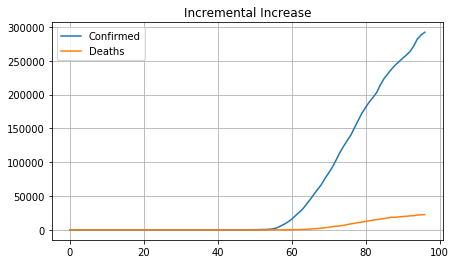

In [13]:
plt.figure(figsize=(7, 4))

plt.plot(confirmed_ts.index, confirmed_ts.Total, label = 'Confirmed')
plt.plot(death_ts.index, death_ts.Total, label = 'Deaths')
plt.title('Incremental Increase')
plt.grid()
plt.legend()
plt.show()

### SEIR Model

In [14]:
def model(Y, x, N, beta0, days0, beta1, gamma, sigma):
    # :param array x: Time step (days)
    # :param int N: Population
    # :param float beta: The parameter controlling how often a susceptible contact results in exposed.
    # :param float sigma: The rate at which an exposed person becomes infective.
    # :param float gamma: The rate an infected recovers and moves into the resistant phase.

    S, E, I, R = Y

    beta = beta0 if x < days0 else beta1

    dS = - beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I
    return dS, dE, dI, dR

def solve(model, population, E0, beta0, days0, beta1, gamma, sigma):
    X = np.arange(daysTotal)  # time steps array
    N0 = population - E0, E0, 0, 0  # S, E, I, R at initial step，

    y_data_var = scipy.integrate.odeint(model, N0, X, args=(population, beta0, days0, beta1, gamma, sigma))

    S, E, I, R = y_data_var.T  # transpose and unpack
    return X, S, E, I, R  # note these are all arrays

### Parameters

In [15]:
pop=population[population['Province_State']=='New York']['Population'].sum(axis=0)

E0 = 1

r0 = 2.85  # https://en.wikipedia.org/wiki/Basic_reproduction_number
r1 = 1.53  # reproduction number after quarantine measures - https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3539694
          # it seems likely that measures will become more restrictive if r1 is not small enough

In [16]:
timePresymptomatic = 2.5  # almost half infections take place before symptom onset (Drosten) https://www.medrxiv.org/content/10.1101/2020.03.08.20032946v1.full.pdf

# I in this model is maybe better described as 'Infectors'? Event infectious persons in quarantine do not count.
sigma = 1.0 / (5.2 - timePresymptomatic)  # The rate at which an exposed person becomes infectious.  symptom onset - presympomatic
# for SEIR: generationTime = 1/sigma + 0.5 * 1/gamma = timeFromInfectionToInfectiousness + timeInfectious  https://en.wikipedia.org/wiki/Serial_interval
generationTime = 4.6  # https://www.medrxiv.org/content/10.1101/2020.03.05.20031815v1  http://www.cidrap.umn.edu/news-perspective/2020/03/short-time-between-serial-covid-19-cases-may-hinder-containment
gamma = 1.0 / (2.0 * (generationTime - 1.0 / sigma))  # The rate an infectious is not recovers and moves into the resistant phase. Note that for the model it only means he does not infect anybody any more.

beta0 = r0 * gamma  # The parameter controlling how often a susceptible-infected contact results in a new infection.
beta1 = r1 * gamma  # beta0 is used during days0 phase, beta1 after days0


In [17]:
days0 = 60 #New York Starts Lock down on March 22nd since '1/22/20'
daysTotal=365

In [18]:
X, S, E, I, R = solve(model, pop, E0, beta0, days0, beta1, gamma, sigma)

### Visualizing For Better Comparison

In [19]:
def pad_or_truncate(some_list, target_len,operation='pad'):
    if operation=='pad':
        return some_list[:target_len] + [np.nan]*(target_len - len(some_list))
    else:
        return some_list[:target_len]

In [21]:
# target_len = len(confirmed_ts.cum_Total.to_list())
target_len=200
X_truncate = pad_or_truncate(X, target_len,'truncate')
S_truncate = pad_or_truncate(S, target_len,'truncate')
E_truncate = pad_or_truncate(E, target_len,'truncate')
I_truncate = pad_or_truncate(I, target_len,'truncate')
R_truncate = pad_or_truncate(R, target_len,'truncate')


Y_confirmed_pad = pad_or_truncate(confirmed_ts.cum_Total.to_list(), target_len,'pad')
Y_deaths_pad = pad_or_truncate(death_ts.cum_Total.to_list(), target_len,'pad')

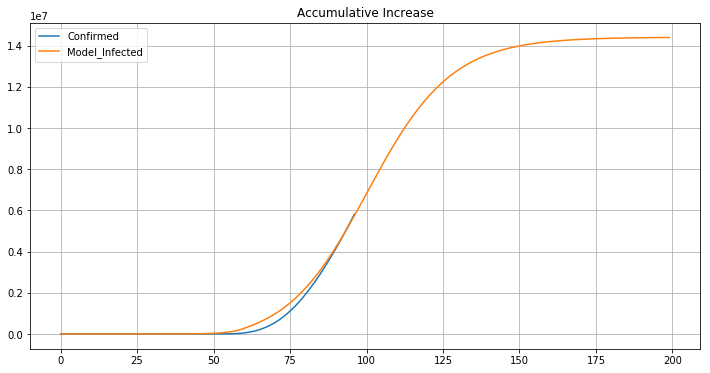

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(X_truncate, Y_confirmed_pad, label = 'Confirmed')
# plt.plot(X, Y_deaths_pad, label = 'Deaths')
# plt.plot(X, S_truncate, label = 'Suceptible')
# plt.plot(X, E_truncate, label = 'Exposed')
# plt.plot(X, I_truncate, label = 'Infected')
# plt.plot(X, R_truncate, label = 'Recovered')
plt.plot(X_truncate, I_truncate+R_truncate, label = 'Model_Infected')

plt.title('Accumulative Increase')
plt.grid()
plt.legend()
plt.show()

In [398]:
from datetime import datetime  
from datetime import timedelta
datetime.strptime('1/22/2020', '%m/%d/%Y')+timedelta(days=160)  

datetime.datetime(2020, 6, 30, 0, 0)